# Programmation linéaire

## Flot Maximal

<img src="./elementaire.svg" width="600">

**VARIABLES**
On appelera $q_{AB}$ le flot le long de l'arrête reliant $A$ à $B$.
Et on adaptera la notation pour les autres arrêtes $q_{AC},q_{BD},q_{CB},q_{CD}$

**CONTRAINTES ARRETES**
On a les contraintes dûes aux capacité des arrêtes:
\begin{align}
0 \leq q_{AB} \leq 4& &\text{ arrete } AB\\
0 \leq q_{AC} \leq 5& &\text{ arrete } AC\\
0 \leq q_{BD} \leq 5& &\text{ arrete } BD\\
0 \leq q_{CB} \leq 2& &\text{ arrete } CB\\
0 \leq q_{CD} \leq 4& &\text{ arrete } CD
\end{align}

**CONTRAINTES NOEUDS** sauf à la source $A$, et au puit $D$

\begin{align}
q_{AB} + q_{CB} = q_{BD}& &\text{ au noeud } B\\
q_{AC} = q_{CB} + q_{CD}& &\text{ au noeud } C
\end{align}

**OBJECTIF**

$$
\max q_{AB} + q_{AC}
$$
ou de manière équivalente
$$
\max q_{BD} + q_{CD}
$$

**REMARQUE** 
- le problème de flot maximal est bien un problème de programmation linéaire.
- l'algorithme utilisé la séance dernière est plus efficace que les algorithmes de programmation linéaire.

**CALCUL EQUIVALENCE**
5 min -> 10h35

Pourquoi a-t-on 
$$q_{AB} + q_{AC} = q_{BD} + q_{CD}$$
lorsque les contraintes sont satisfaites?

**ETAPE 1** on ajoute toutes les égalités aux noeuds.

$$
q_{AB} + q_{CB} + q_{AC} = q_{BD} + q_{CB} + q_{CD}
$$

**ETAPE 2** on élimine les quantités présentes des deux côtés
$$
q_{AB} + q_{AC} = q_{BD} + q_{CD}
$$

**COMPLEMENT** expliquer pourquoi cette démarche marche de manière générale.

## Reformulation

On introduit des arrêtes artificielles entrant dans la source et sortant du puit.

<img src="./elementaire_bis.svg" width="600">

**VARIABLES**

$q_s, q_{AB}, q_{AC},q_{BD},q_{CB},q_{CD}, q_p$

**CONTRAINTES ARRETES**

\begin{align}
&0\leq q_s&\\
&0 \leq q_{AB} \leq 4 &\text{ arrete } AB\\
&0 \leq q_{AC} \leq 5 &\text{ arrete } AC\\
&0 \leq q_{BD} \leq 5 &\text{ arrete } BD\\
&0 \leq q_{CB} \leq 2 &\text{ arrete } CB\\
&0 \leq q_{CD} \leq 4 &\text{ arrete } CD\\
&0\leq q_p&
\end{align}

**CONTRAINTES NOEUDS**

\begin{align}
&q_s = q_{AB} + q_{AC} &\text{ au noeud } A\\
&q_{AB} + q_{CB} = q_{BD} &\text{ au noeud } B\\
&q_{AC} = q_{CB} + q_{CD} &\text{ au noeud } C\\
& q_{BD} + q_{CD} = q_p &\text{ au noeud } D
\end{align}

**OBJECTIF**

$$\max q_s$$
ou de manière équivalente (là encore il suffit de sommet toutes les égalités aux sommets)
$$\max q_p$$

## Résolution avec `scipy`

In [1]:
from scipy.optimize import linprog

In [2]:
import numpy as np

### Exercice
10min -> 11h

Résolvez les programmes linéaires ci-dessus avec `linprog`.


In [4]:
c = np.array([-1, 0, 0, 0, 0, 0, 0])
c

array([-1,  0,  0,  0,  0,  0,  0])

In [11]:
A_ub = np.matrix("""
-1 0 0 0 0 0 0;
0 -1 0 0 0 0 0;
0 0 -1 0 0 0 0;
0 0 0 -1 0 0 0;
0 0 0 0 -1 0 0;
0 0 0 0 0 -1 0;
0 0 0 0 0 0 -1;
0 1 0 0 0 0 0;
0 0 1 0 0 0 0;
0 0 0 1 0 0 0;
0 0 0 0 1 0 0;
0 0 0 0 0 1 0
""")
A_ub = np.array(A_ub)
A_ub

array([[-1,  0,  0,  0,  0,  0,  0],
       [ 0, -1,  0,  0,  0,  0,  0],
       [ 0,  0, -1,  0,  0,  0,  0],
       [ 0,  0,  0, -1,  0,  0,  0],
       [ 0,  0,  0,  0, -1,  0,  0],
       [ 0,  0,  0,  0,  0, -1,  0],
       [ 0,  0,  0,  0,  0,  0, -1],
       [ 0,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0]])

In [6]:
A_ub.shape

(12, 7)

In [7]:
b_ub = np.array([0, 0, 0, 0, 0, 0, 0, 4, 5, 5, 2, 4])
b_ub

array([0, 0, 0, 0, 0, 0, 0, 4, 5, 5, 2, 4])

In [12]:
A_eq = np.matrix("""
1 -1 -1 0 0 0 0;
0 1 0 -1 1 0 0;
0 0 1 0 -1 -1 0;
0 0 0 1 0 1 -1
""")
A_eq = np.array(A_eq)
A_eq

array([[ 1, -1, -1,  0,  0,  0,  0],
       [ 0,  1,  0, -1,  1,  0,  0],
       [ 0,  0,  1,  0, -1, -1,  0],
       [ 0,  0,  0,  1,  0,  1, -1]])

In [13]:
b_eq = np.array(4 * [0])
b_eq

array([0, 0, 0, 0])

In [15]:
solution = linprog(c=c, A_eq=A_eq, b_eq=b_eq, A_ub=A_ub, b_ub=b_ub)
print(solution)

     con: array([ 3.92486044e-12, -3.82782694e-12,  4.02966549e-12, -3.95417032e-12])
     fun: -8.999999999912182
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([9.00000000e+00, 4.00000000e+00, 5.00000000e+00, 5.00000000e+00,
       1.00000000e+00, 4.00000000e+00, 9.00000000e+00, 2.61133337e-11,
       5.77795589e-11, 5.76498849e-11, 1.00000000e+00, 2.60409472e-11])
  status: 0
 success: True
       x: array([9., 4., 5., 5., 1., 4., 9.])


In [16]:
linprog(c=c, A_eq=A_eq, b_eq=b_eq, A_ub=A_ub, b_ub=b_ub, method="simplex")

     con: array([0., 0., 0., 0.])
     fun: -9.0
 message: 'Optimization terminated successfully.'
     nit: 9
   slack: array([9., 4., 5., 5., 1., 4., 9., 0., 0., 0., 1., 0.])
  status: 0
 success: True
       x: array([9., 4., 5., 5., 1., 4., 9.])

In [17]:
linprog(c=c, A_eq=A_eq, b_eq=b_eq, A_ub=A_ub, b_ub=b_ub, method="highs")

           con: array([0., 0., 0., 0.])
 crossover_nit: 0
           fun: -9.0
       message: 'Optimization terminated successfully.'
           nit: 3
         slack: array([9., 4., 5., 5., 1., 4., 9., 0., 0., 0., 1., 0.])
        status: 0
       success: True
             x: array([9., 4., 5., 5., 1., 4., 9.])

**REMARQUE** 

le simplexe est présent pour des raisons historiques, on préférera les autres solvers en particulier les `highs` récents.

**REMARQUE**

- On rentre manuellement les matrices ce qui peut être source d'erreur vue la quantité de coefficients.
- La modélisation est faite manuellement.
- De plus on ne peut résoudre que des problèmes linéaires en variable continue.

## Cas des variables entières

on cherche à maximiser $4x+3y$ sous les contraintes

\begin{align}
0\leq x\\
0\leq y\\
2x+y\leq2\\
x+2y\leq 2\\
\end{align}
avec $x$ et $y$ des entiers.

### Exercice 10min -> 11h30

1. Essayer d'utiliser `linprog`.
2. Dessiner le domaine de maximisation.

In [22]:
c = np.array([-4, -3])
A_ub = np.matrix("""
-1  0;
 0 -1;
 2  1;
 1  2
""")
b_ub = np.array([0, 0, 2, 2])
solution = linprog(c=c, A_ub=A_ub, b_ub=b_ub, method="highs")
print(solution)

           con: array([], dtype=float64)
 crossover_nit: 0
           fun: -4.666666666666666
       message: 'Optimization terminated successfully.'
           nit: 2
         slack: array([0.66666667, 0.66666667, 0.        , 0.        ])
        status: 0
       success: True
             x: array([0.66666667, 0.66666667])


**REMARQUE** la solution du problème continu n'est clairement pas entière!

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (12, 8)

In [24]:
c1 = lambda x,y: x
c2 = lambda x,y: y
c3 = lambda x,y: 2 * x + y
c4 = lambda x,y: x + 2 * y

In [27]:
xs, ys = np.linspace(-1, 3, 400), np.linspace(-1, 3, 400)
X, Y = np.meshgrid(xs, ys)

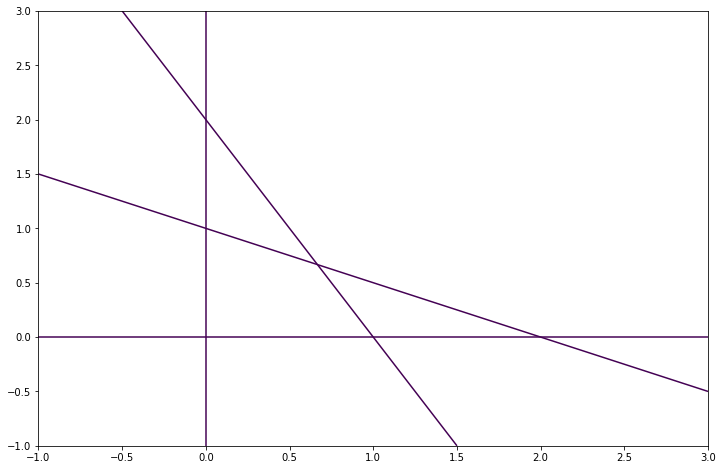

In [30]:
figure, repere = plt.subplots()
C1 = c1(X, Y)
repere.contour(X, Y, C1, levels=[0])
C2 = c2(X, Y)
repere.contour(X, Y, C2, levels=[0])
C3 = c3(X, Y)
repere.contour(X, Y, C3, levels=[2])
C4 = c4(X, Y)
repere.contour(X, Y, C4, levels=[2])


On constate qu'il n'y a que trois points à coordonnées entières dans le domaine : $(0,0), (0, 1), (1, 0)$

On voit que le maximum est atteint sur le troisième point: $(1, 0) \to 4$.

## Bibliothèque `pulp`.

In [31]:
import pulp as pp

In [52]:
probleme = pp.LpProblem("test", pp.LpMaximize)
probleme

test:
MAXIMIZE
None
VARIABLES

In [53]:
x = pp.LpVariable("x", 0, None, pp.LpInteger)
x

x

In [54]:
y = pp.LpVariable("y", 0, None, pp.LpInteger)
y

y

In [55]:
probleme.setObjective(4 * x + 3 * y)
probleme

test:
MAXIMIZE
4*x + 3*y + 0
VARIABLES
0 <= x Integer
0 <= y Integer

In [56]:
probleme.addConstraint(2 * x + y <= 2)
probleme

test:
MAXIMIZE
4*x + 3*y + 0
SUBJECT TO
_C1: 2 x + y <= 2

VARIABLES
0 <= x Integer
0 <= y Integer

In [57]:
probleme.addConstraint(x + 2 * y <= 2)
probleme

test:
MAXIMIZE
4*x + 3*y + 0
SUBJECT TO
_C1: 2 x + y <= 2

_C2: x + 2 y <= 2

VARIABLES
0 <= x Integer
0 <= y Integer

In [58]:
probleme.solve()

1

In [59]:
print(probleme)

test:
MAXIMIZE
4*x + 3*y + 0
SUBJECT TO
_C1: 2 x + y <= 2

_C2: x + 2 y <= 2

VARIABLES
0 <= x Integer
0 <= y Integer



In [60]:
probleme.status

1

In [61]:
dir(probleme)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_variable_ids',
 '_variables',
 'add',
 'addConstraint',
 'addVariable',
 'addVariables',
 'assignConsPi',
 'assignConsSlack',
 'assignStatus',
 'assignVarsDj',
 'assignVarsVals',
 'checkDuplicateVars',
 'checkLengthVars',
 'coefficients',
 'constraints',
 'copy',
 'deepcopy',
 'dummyVar',
 'extend',
 'fixObjective',
 'fromDict',
 'fromJson',
 'fromMPS',
 'from_dict',
 'from_json',
 'getSense',
 'get_dummyVar',
 'infeasibilityGap',
 'isMIP',
 'lastUnused',
 'modifiedConstraints',
 'modifiedVariables',
 'name',
 'noOverlap',
 'normalisedNames',
 'numConstraints',
 'numVariabl

In [62]:
for var in probleme.variables():
    print(var, var.value())

x 1.0
y 0.0


In [70]:
probleme.objective.value()

4.0

In [63]:
probleme.valid()

True

In [68]:
from rich import pretty
pretty.install()

In [69]:
probleme.to_dict()

{ 
 'objective' : { 
 'name' : 'OBJ' ,
 'coefficients' : [{ 'name' : 'x' , 'value' : 4 } , { 'name' : 'y' , 'value' : 3 }] 
 } ,
 'constraints' : [ 
 { 
 'sense' : -1 ,
 'pi' : -0.0 ,
 'constant' : -2 ,
 'name' : None ,
 'coefficients' : [ 
 { 'name' : 'x' , 'value' : 2 } ,
 { 'name' : 'y' , 'value' : 1 } 
 ] 
 } ,
 { 
 'sense' : -1 ,
 'pi' : -0.0 ,
 'constant' : -2 ,
 'name' : None ,
 'coefficients' : [ 
 { 'name' : 'x' , 'value' : 1 } ,
 { 'name' : 'y' , 'value' : 2 } 
 ] 
 } 
 ] ,
 'variables' : [ 
 { 
 'lowBound' : 0 ,
 'upBound' : None ,
 'cat' : 'Integer' ,
 'varValue' : 1.0 ,
 'dj' : 4.0 ,
 'name' : 'x' 
 } ,
 { 
 'lowBound' : 0 ,
 'upBound' : None ,
 'cat' : 'Integer' ,
 'varValue' : 0.0 ,
 'dj' : 3.0 ,
 'name' : 'y' 
 } 
 ] ,
 'parameters' : { 'name' : 'test' , 'sense' : -1 , 'status' : 1 , 'sol_status' : 1 } ,
 'sos1' : [] ,
 'sos2' : [] 
 }

### Exercice
15min -> 12h05

Utiliser `pulp` pour reprendre les programmes linéaires de flot maximal.

In [74]:
flot_max = pp.LpProblem("flot_maximal", pp.LpMaximize)

qs = pp.LpVariable("q_s", 0, None, pp.LpContinuous)
qAB = pp.LpVariable("q_AB", 0, 4, pp.LpContinuous)
qAC = pp.LpVariable("q_AC", 0, 5, pp.LpContinuous)
qBD = pp.LpVariable("q_BD", 0, 5, pp.LpContinuous)
qCB = pp.LpVariable("q_CB", 0, 2, pp.LpContinuous)
qCD= pp.LpVariable("q_CD", 0, 4, pp.LpContinuous)
qp = pp.LpVariable("q_p", 0, None, pp.LpContinuous)

flot_max.setObjective(qs)

flot_max.addConstraint(qs == qAB + qAC)
flot_max.addConstraint(qAB + qCB == qBD)
flot_max.addConstraint(qAC == qCB + qCD)
flot_max.addConstraint(qBD + qCD == qp)

print(flot_max)

flot_maximal:
MAXIMIZE
1*q_s + 0.0
SUBJECT TO
_C1: - q_AB - q_AC + q_s = 0

_C2: q_AB - q_BD + q_CB = 0

_C3: q_AC - q_CB - q_CD = 0

_C4: q_BD + q_CD - q_p = 0

VARIABLES
q_AB <= 4 Continuous
q_AC <= 5 Continuous
q_BD <= 5 Continuous
q_CB <= 2 Continuous
q_CD <= 4 Continuous
q_p Continuous
q_s Continuous



In [75]:
flot_max.solve()

1

In [76]:
flot_max.to_dict()

{ 
 'objective' : { 'name' : 'OBJ' , 'coefficients' : [{ 'name' : 'q_s' , 'value' : 1 }]} ,
 'constraints' : [ 
 { 
 'sense' : 0 ,
 'pi' : 1.0 ,
 'constant' : 0 ,
 'name' : None ,
 'coefficients' : [ 
 { 'name' : 'q_s' , 'value' : 1 } ,
 { 'name' : 'q_AB' , 'value' : -1 } ,
 { 'name' : 'q_AC' , 'value' : -1 } 
 ] 
 } ,
 { 
 'sense' : 0 ,
 'pi' : -0.0 ,
 'constant' : 0 ,
 'name' : None ,
 'coefficients' : [ 
 { 'name' : 'q_AB' , 'value' : 1 } ,
 { 'name' : 'q_CB' , 'value' : 1 } ,
 { 'name' : 'q_BD' , 'value' : -1 } 
 ] 
 } ,
 { 
 'sense' : 0 ,
 'pi' : -0.0 ,
 'constant' : 0 ,
 'name' : None ,
 'coefficients' : [ 
 { 'name' : 'q_AC' , 'value' : 1 } ,
 { 'name' : 'q_CB' , 'value' : -1 } ,
 { 'name' : 'q_CD' , 'value' : -1 } 
 ] 
 } ,
 { 
 'sense' : 0 ,
 'pi' : -0.0 ,
 'constant' : 0 ,
 'name' : None ,
 'coefficients' : [ 
 { 'name' : 'q_BD' , 'value' : 1 } ,
 { 'name' : 'q_CD' , 'value' : 1 } ,
 { 'name' : 'q_p' , 'value' : -1 } 
 ] 
 } 
 ] ,
 'variables' : [ 
 { 
 'lowBound' : 0 ,
 'upBound' : 4 ,
 'cat' : 'Continuous' ,
 'varValue' : 4.0 ,
 'dj' : 1.0 ,
 'name' : 'q_AB' 
 } ,
 { 
 'lowBound' : 0 ,
 'upBound' : 5 ,
 'cat' : 'Continuous' ,
 'varValue' : 5.0 ,
 'dj' : 1.0 ,
 'name' : 'q_AC' 
 } ,
 { 
 'lowBound' : 0 ,
 'upBound' : 5 ,
 'cat' : 'Continuous' ,
 'varValue' : 5.0 ,
 'dj' : 0.0 ,
 'name' : 'q_BD' 
 } ,
 { 
 'lowBound' : 0 ,
 'upBound' : 2 ,
 'cat' : 'Continuous' ,
 'varValue' : 1.0 ,
 'dj' : 0.0 ,
 'name' : 'q_CB' 
 } ,
 { 
 'lowBound' : 0 ,
 'upBound' : 4 ,
 'cat' : 'Continuous' ,
 'varValue' : 4.0 ,
 'dj' : 0.0 ,
 'name' : 'q_CD' 
 } ,
 { 
 'lowBound' : 0 ,
 'upBound' : None ,
 'cat' : 'Continuous' ,
 'varValue' : 9.0 ,
 'dj' : 0.0 ,
 'name' : 'q_p' 
 } ,
 { 
 'lowBound' : 0 ,
 'upBound' : None ,
 'cat' : 'Continuous' ,
 'varValue' : 9.0 ,
 'dj' : 0.0 ,
 'name' : 'q_s' 
 } 
 ] ,
 'parameters' : { 
 'name' : 'flot_maximal' ,
 'sense' : -1 ,
 'status' : 1 ,
 'sol_status' : 1 
 } ,
 'sos1' : [] ,
 'sos2' : [] 
 }

In [77]:
flot_max.objective.value()

9.0

# Exercice

- Reprenez la méthode pour l'autre problème de flot maximal vu dans la séance précédente.
- Codez une fonction qui génère le programme linéaire à partir du graphe.